<a href="https://colab.research.google.com/github/RoshanSalian/ImageCalculator/blob/master/ImageCalculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2

image = cv2.imread('digits.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [13]:
cells = [np.hsplit(row, 100) for row in np.vsplit(gray, 50)]
x = np.array(cells)
print(x.shape)

(50, 100, 20, 20)


In [0]:
train = x[:, :70].reshape(-1, 400).astype(np.float32)
test = x[:, 70:100].reshape(-1, 400).astype(np.float32)

In [15]:
k = [0, 1, 2, 3, 4, 5, 6,7 ,8 , 9]
train_labels = np.repeat(k, 350)[:, np.newaxis]
test_labels = np.repeat(k, 150)[:, np.newaxis]

knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
ret, result, neighbours, distance = knn.findNearest(test, k=3)

matches = result == test_labels
correct = np.count_nonzero(matches)
accuracy = correct * (100.0 / result.size)
print("Accuracy is = %.2f" % accuracy + "%")

Accuracy is = 93.47%


In [0]:
def x_cord_contour(contour):
  if cv2.contourArea(contour)>10:
    M = cv2.moments(contour)
    return(int(M['m10']/M['m00']))

def makeSquare(not_square):
  BLACK = [0, 0, 0]
  img_dim = not_square.shape
  width = img_dim[1]
  height = img_dim[0]
  if(height==width):
    return not_square
  else:
    double_size = cv2.resize(not_square, (2*width, 2*height), interpolation = cv2.INTER_CUBIC)
    height = height*2
    width = width*2
    if(height > width):
      pad = (height-width)//2
      doublesize_square = cv2.copyMakeBorder(double_size, 0, 0, pad, pad, cv2.BORDER_CONSTANT,value=BLACK)
    else:
      pad = (width-height)//2
      print(type(double_size))
      print(type(pad))
      #print(type())
      doublesize_square = cv2.copyMakeBorder(double_size, pad, pad, 0, 0, cv2.BORDER_CONSTANT,value=BLACK)

    print(type(doublesize_square)) 
    return doublesize_square

def resize_to_pixels(dimension, image):
  buffer_pix = 4
  dimension = dimension - buffer_pix
  squared = image
  r = float(dimension)/squared.shape[1]
  dim = (dimension, int(squared.shape[0]*r))
  resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
  img_dim2 = resized.shape
  height_r = img_dim2[0]
  width_r = img_dim2[1]
  BLACK = [0, 0, 0]
  if (height_r > width_r):
      resized = cv2.copyMakeBorder(resized,0,0,0,1,cv2.BORDER_CONSTANT,value=BLACK)
  if (height_r < width_r):
      resized = cv2.copyMakeBorder(resized,1,0,0,0,cv2.BORDER_CONSTANT,value=BLACK)
  p = 2
  ReSizedImg = cv2.copyMakeBorder(resized,p,p,p,p,cv2.BORDER_CONSTANT,value=BLACK)
  return ReSizedImg


<class 'numpy.ndarray'>


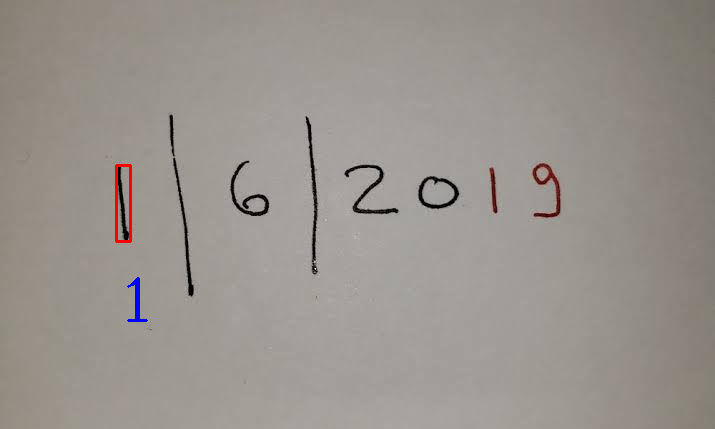

<class 'numpy.ndarray'>


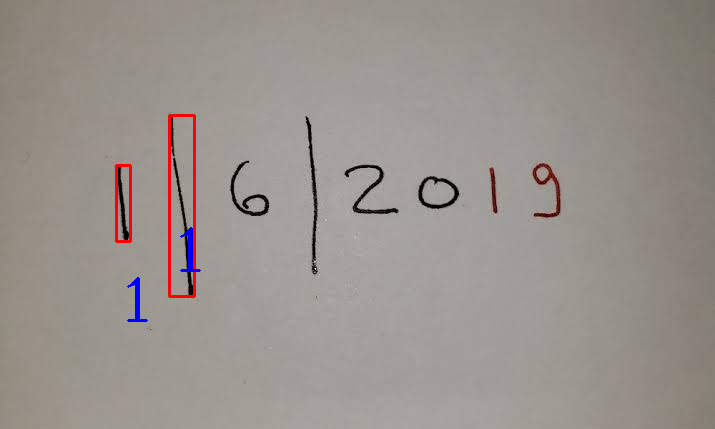

<class 'numpy.ndarray'>


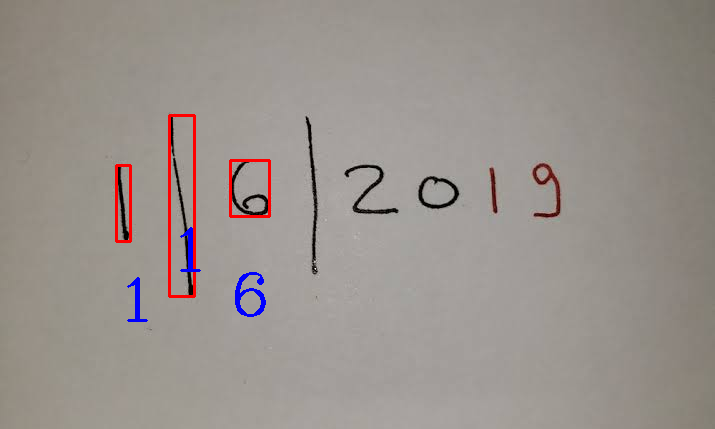

<class 'numpy.ndarray'>


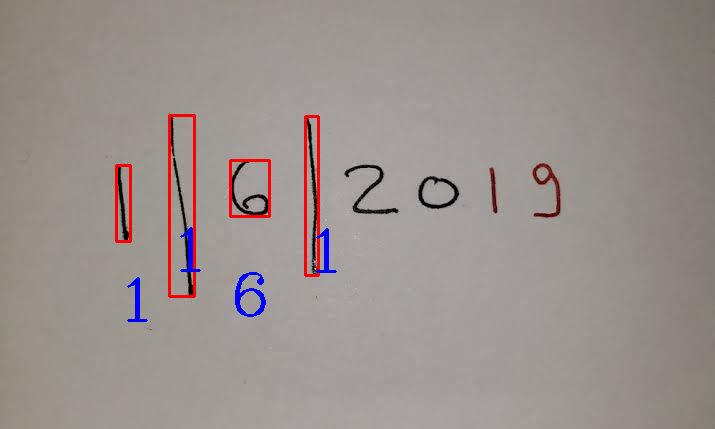

<class 'numpy.ndarray'>
<class 'int'>
<class 'numpy.ndarray'>


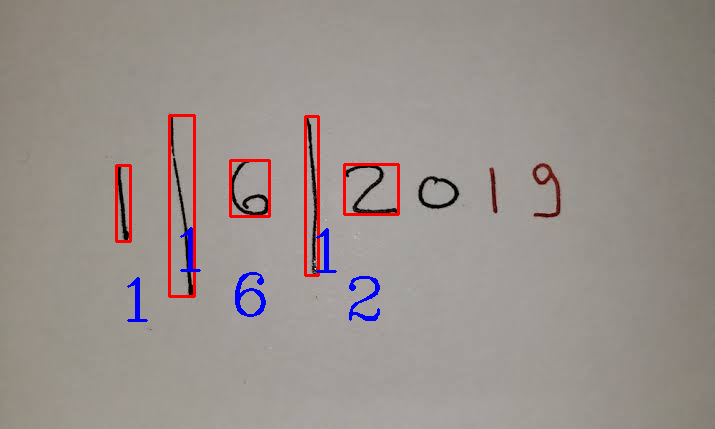

<class 'numpy.ndarray'>
<class 'int'>
<class 'numpy.ndarray'>


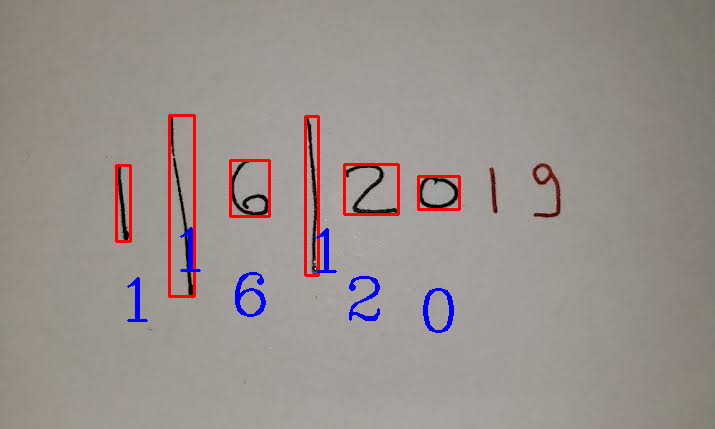

<class 'numpy.ndarray'>


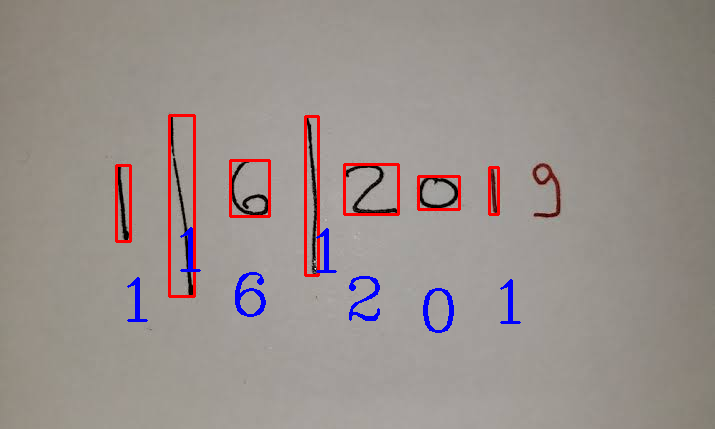

<class 'numpy.ndarray'>


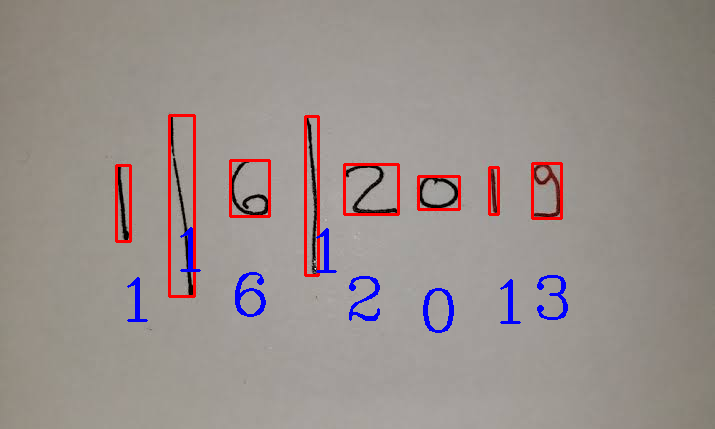

The number is: 11612013


In [56]:
from google.colab.patches import cv2_imshow

image = cv2.imread('test1.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blur, 30, 150)

contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=x_cord_contour, reverse=False)
full_number = []

for c in contours:
  (x, y, w, h) = cv2.boundingRect(c)
  if w>=5 and h>=25:
    roi = blur[y:y+h, x:x+w]
    ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY_INV)
    squared = makeSquare(roi)
    final = resize_to_pixels(20, squared)
    cv2_imshow(final)
    final_array = final.reshape((1,400))
    final_array = final_array.astype(np.float32)
    ret, result, neighbours, dist = knn.findNearest(final_array, k=1)
    number = str(int(float(result[0])))
    full_number.append(number)
    # draw a rectangle around the digit, the show what the
    # digit was classified as
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.putText(image, number, (x , y + 155),
        cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
    cv2_imshow(image)
    cv2.waitKey(0) 
        
cv2.destroyAllWindows()
print ("The number is: " + ''.join(full_number))